## Alaska Berry Futures
### Temperature change over time

February 23, 2023    
Using ACRC temperature data to investigate freeze thaw days in selected locations across Alaska    
https://akclimate.org/data/data-portal/    
    
Lingonberry Threat - "Spring icing: In a study in Sweden, when winter warming melted snow but then froze again to cover the plants
in ice for weeks or months two winters in a row there was a significant decrease in the number of flowers." - can we apply to Alaska?

In [ ]:
## TO DO download csv with snow depth as well 

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
working_directory = os.getcwd()
bethel =  pd.read_csv(working_directory + "\\acrc_USW00026615_daily_Bethel max min temp.csv", skiprows=4)
coldbay = pd.read_csv(working_directory + "\\acrc_USW00025624_daily_coldbay max min temp.csv", skiprows=4)
anchorage = pd.read_csv(working_directory + "\\acrc_USW00026451_daily_anchorage max min temp.csv", skiprows=4)
ketchikan = pd.read_csv(working_directory + "\\acrc_USW00025325_daily_ketchikan max min temp.csv", skiprows=4)
kotzebue = pd.read_csv(working_directory + "\\acrc_USW00026616_daily_kotzebue max min temp.csv", skiprows=4)
nome = pd.read_csv(working_directory + "\\acrc_USW00026617_daily_nome max min temp.csv", skiprows=4)
northpole = pd.read_csv(working_directory + "\\acrc_USC00506581_daily_northpole max min temp.csv", skiprows=4)


In [3]:
bethel.head()

,Date,Maximum Temperature (degF),Minimum Temperature (degF)
0,1980-01-01,-11.0,-17.0
1,1980-01-02,-10.0,-14.0
2,1980-01-03,2.0,-14.0
3,1980-01-04,32.0,-1.0
4,1980-01-05,33.0,20.0


In [4]:
coldbay.head()

,Date,Maximum Temperature (degF),Minimum Temperature (degF)
0,1980-01-01,12.0,-1.0
1,1980-01-02,30.0,6.0
2,1980-01-03,40.0,30.0
3,1980-01-04,40.0,37.0
4,1980-01-05,38.0,36.0


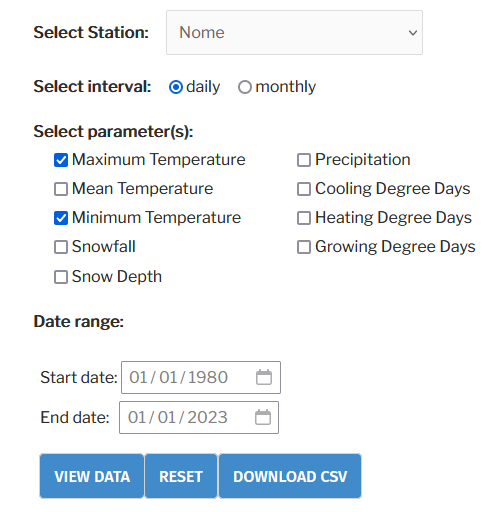

In [5]:
# #count freeze thaw days per winter (Dec, Jan, Feb)

# def count_freeze_thaw_days(df):
#     # Convert the 'Date' column to datetime format if it's not already.
#     df['Date'] = pd.to_datetime(df['Date'])

#     # Define the winter year based on the month.
#     df['Winter_Year'] = df['Date'].dt.year + (df['Date'].dt.month == 12)

#     # Define a freeze-thaw day: Max Temp > 32 and Min Temp < 32.
#     df['Freeze_Thaw'] = (df['Maximum Temperature (degF)'] > 32) & (df['Minimum Temperature (degF)'] < 32)

#     # Filter the DataFrame for only December, January, and February.
#     winter_months = df[df['Date'].dt.month.isin([12, 1, 2])]

#     # Group by winter year and count freeze-thaw days.
#     freeze_thaw_counts = winter_months.groupby('Winter_Year')['Freeze_Thaw'].sum().reset_index()

#     # Rename the columns for clarity.
#     freeze_thaw_counts.rename(columns={'Freeze_Thaw': 'Freeze_Thaw_Days'}, inplace=True)

#     return freeze_thaw_counts

# # Example usage:
# # Assuming `df` is your DataFrame with the temperature data.
# # freeze_thaw_df = count_freeze_thaw_days(df)
# # print(freeze_thaw_df)

In [6]:
# def count_freeze_thaw_followed_by_cold(df):
#     # Convert 'Date' to datetime if not already done
#     df['Date'] = pd.to_datetime(df['Date'])

#     # Calculate the Winter Year
#     df['Winter_Year'] = df['Date'].dt.year + (df['Date'].dt.month == 12)

#     # Identify freeze-thaw days
#     df['Freeze_Thaw'] = (df['Maximum Temperature (degF)'] > 32) & (df['Minimum Temperature (degF)'] < 32)
    
#     # Initialize a list to hold the count for each winter year
#     winter_counts = []

#     for year in df['Winter_Year'].unique():
#         # Filter the DataFrame for the current winter year
#         winter_df = df[df['Winter_Year'] == year]

#         # Filter for December, January, and February of the winter year
#         winter_df = winter_df[winter_df['Date'].dt.month.isin([12, 1, 2])]

#         # Sort by date to ensure correct sequential processing
#         winter_df = winter_df.sort_values(by='Date')

#         # Initialize the count of freeze-thaw events followed by 3 weeks of cold
#         count = 0

#         for index, row in winter_df.iterrows():
#             if row['Freeze_Thaw']:
#                 # Get the date of the freeze-thaw event
#                 ft_date = row['Date']
#                 # Calculate the end date for the 3-week period
#                 end_date = ft_date + pd.Timedelta(days=21)
#                 # Select the next 21 days in the DataFrame
#                 subsequent_period = winter_df[(winter_df['Date'] > ft_date) & (winter_df['Date'] <= end_date)]

#                 # Check if all days in the subsequent period are below freezing
#                 if len(subsequent_period) == 21 and (subsequent_period['Minimum Temperature (degF)'] < 32).all():
#                     count += 1

#         # Add the count for the winter year to the list
#         winter_counts.append((year, count))

#     # Convert the list of tuples to a DataFrame
#     result_df = pd.DataFrame(winter_counts, columns=['Winter_Year', 'Freeze_Thaw_Followed_By_Cold_Count'])
#     return result_df

# # Example usage:
# # freeze_thaw_cold_df = count_freeze_thaw_followed_by_cold(df)
# # print(freeze_thaw_cold_df)

In [18]:

def combined_freeze_thaw_counts(df, months, n_days_freezing):
    """
    This function analyzes a DataFrame containing daily maximum and minimum temperature readings. 
    It identifies and counts two specific winter weather events for each winter year (defined as 
    December of the current year to February of the following year): 
    1) The number of freeze-thaw days, where the maximum temperature exceeds the freezing point 
       (32 degrees Fahrenheit) and the minimum temperature is below freezing on the same day.
    2) The number of freeze-thaw days that are immediately followed by a continuous three-week 
       period of sub-freezing temperatures.

    The function returns a DataFrame with columns for the winter year, the count of freeze-thaw days, 
    and the count of freeze-thaw days followed by three weeks of consistent cold temperatures. 

    Parameters:
    - df (DataFrame): A pandas DataFrame with columns 'Date', 'Maximum Temperature (degF)', and 
                      'Minimum Temperature (degF)'.
    Returns:
    - DataFrame: A pandas DataFrame with each row representing a winter year and columns for the 
                 count of freeze-thaw days and the count of extended cold periods following 
                 freeze-thaw days.
    """

    # Convert 'Date' to datetime if not already done
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate the Winter Year
    df['Winter_Year'] = df['Date'].dt.year + (df['Date'].dt.month == 12)

    # Identify freeze-thaw days
    df['Freeze_Thaw'] = (df['Maximum Temperature (degF)'] > 32) & (df['Minimum Temperature (degF)'] < 32)
    
    # Initialize a list to hold the combined results
    combined_results = []

    for year in df['Winter_Year'].unique():
        # Filter the DataFrame for the current winter year
        winter_df = df[df['Winter_Year'] == year]

        # Filter for December, January, February, and March of the winter year
        winter_months = winter_df[winter_df['Date'].dt.month.isin(months)]

        # Sort by date to ensure correct sequential processing
        winter_months_sorted = winter_months.sort_values(by='Date')

        # Count freeze-thaw days
        freeze_thaw_count = winter_months_sorted['Freeze_Thaw'].sum()

        # Initialize the count of freeze-thaw events followed by 3 weeks of cold
        cold_streak_count = 0

        for index, row in winter_months_sorted.iterrows():
            if row['Freeze_Thaw']:
                # Get the date of the freeze-thaw event
                ft_date = row['Date']
                # Calculate the end date for the 2-week period
                end_date = ft_date + pd.Timedelta(days=n_days_freezing)
                # Select the next 14 days in the DataFrame
                subsequent_period = winter_months_sorted[(winter_months_sorted['Date'] > ft_date) & (winter_months_sorted['Date'] <= end_date)]

                # Check if all days in the subsequent period are below freezing
                if len(subsequent_period) >= n_days_freezing and (subsequent_period['Maximum Temperature (degF)'] <= 32).all():
                    cold_streak_count += 1
                    

        # Add the combined result for the winter year to the list
        combined_results.append({
            'Winter_Year': year,
            'Freeze_Thaw_Days': freeze_thaw_count,
            'Freeze_Thaw_Followed_By_Cold_Count': cold_streak_count
        })

    # Convert the list of dictionaries to a DataFrame
    result_df = pd.DataFrame(combined_results)
    return result_df

# Example usage:
# combined_df = combined_freeze_thaw_counts(df)
# print(combined_df)


In [21]:
def apply_combined_freeze_thaw_counts_to_list(df_list, months, n_days_freezing):
    """
    Applies the combined_freeze_thaw_counts function to a list of named DataFrames and returns a 
    single DataFrame. The result includes columns for each input DataFrame, with the column names 
    prefixed by the name of the original DataFrame for identification.
    
    Parameters:
    - df_list (list of tuples): A list where each element is a tuple with the first element being 
                                a string representing the name of the DataFrame and the second 
                                element being the DataFrame itself.
                                
    Returns:
    - DataFrame: A single pandas DataFrame containing the results from each DataFrame in df_list, 
                 with columns named according to the name provided for each DataFrame.
    """
    
    # Initialize an empty list to store the resulting DataFrames
    results = []
    
    # Iterate over the list of DataFrames
    for name, df in df_list:
        # Apply the combined_freeze_thaw_counts function to each DataFrame
        result_df = combined_freeze_thaw_counts(df, months, n_days_freezing)
        
        # Prefix the column names with the name of the DataFrame
        result_df.columns = [f"{name}_{col}" for col in result_df.columns]
        
        # Append the result to the list
        results.append(result_df)
    
    # Concatenate all the result DataFrames horizontally
    combined_results = pd.concat(results, axis=1)
    
    return combined_results

# Example usage:
# Assuming you have a list of tuples with names and DataFrames
# df_list = [('df1', dataframe1), ('df2', dataframe2), ...]
# combined_df = apply_combined_freeze_thaw_counts_to_list(df_list)
# print(combined_df)

In [9]:
ak_towns = [('bethel', bethel), ('coldbay', coldbay), 
            ('anchorage', anchorage), ('ketchikan', ketchikan),
            ('kotzebue', kotzebue), ('nome', nome),
            ('northpole', northpole)
            ]

In [22]:
winter_df = apply_combined_freeze_thaw_counts_to_list(ak_towns, [12,1,2,3], 14)

In [23]:
winter_df

,bethel_Winter_Year,bethel_Freeze_Thaw_Days,bethel_Freeze_Thaw_Followed_By_Cold_Count,coldbay_Winter_Year,coldbay_Freeze_Thaw_Days,coldbay_Freeze_Thaw_Followed_By_Cold_Count,anchorage_Winter_Year,anchorage_Freeze_Thaw_Days,anchorage_Freeze_Thaw_Followed_By_Cold_Count,ketchikan_Winter_Year,...,ketchikan_Freeze_Thaw_Followed_By_Cold_Count,kotzebue_Winter_Year,kotzebue_Freeze_Thaw_Days,kotzebue_Freeze_Thaw_Followed_By_Cold_Count,nome_Winter_Year,nome_Freeze_Thaw_Days,nome_Freeze_Thaw_Followed_By_Cold_Count,northpole_Winter_Year,northpole_Freeze_Thaw_Days,northpole_Freeze_Thaw_Followed_By_Cold_Count
0,1980,26,2,1980,24,0,1980,36,0,1980,...,0,1980,5,1,1980,16,1,1980,30,0
1,1981,45,3,1981,44,0,1981,58,0,1981,...,0,1981,5,2,1981,22,3,1981,45,1
2,1982,25,2,1982,44,0,1982,16,2,1982,...,0,1982,4,1,1982,8,2,1982,13,1
3,1983,21,3,1983,50,1,1983,36,3,1983,...,0,1983,1,1,1983,19,2,1983,11,1
4,1984,26,2,1984,35,1,1984,34,2,1984,...,0,1984,2,1,1984,18,1,1984,21,1
5,1985,29,1,1985,44,0,1985,52,1,1985,...,0,1985,4,2,1985,19,2,1985,17,1
6,1986,29,1,1986,35,0,1986,42,2,1986,...,0,1986,3,1,1986,25,3,1986,13,2
7,1987,42,2,1987,53,0,1987,49,0,1987,...,0,1987,4,1,1987,24,3,1987,19,1
8,1988,21,2,1988,47,0,1988,44,2,1988,...,0,1988,6,2,1988,8,2,1988,19,2
9,1989,29,1,1989,52,0,1989,37,2,1989,...,0,1989,6,1,1989,11,2,1989,12,1


In [24]:
autumn_df = apply_combined_freeze_thaw_counts_to_list(ak_towns, [10,11], 14)

In [25]:
autumn_df

,bethel_Winter_Year,bethel_Freeze_Thaw_Days,bethel_Freeze_Thaw_Followed_By_Cold_Count,coldbay_Winter_Year,coldbay_Freeze_Thaw_Days,coldbay_Freeze_Thaw_Followed_By_Cold_Count,anchorage_Winter_Year,anchorage_Freeze_Thaw_Days,anchorage_Freeze_Thaw_Followed_By_Cold_Count,ketchikan_Winter_Year,...,ketchikan_Freeze_Thaw_Followed_By_Cold_Count,kotzebue_Winter_Year,kotzebue_Freeze_Thaw_Days,kotzebue_Freeze_Thaw_Followed_By_Cold_Count,nome_Winter_Year,nome_Freeze_Thaw_Days,nome_Freeze_Thaw_Followed_By_Cold_Count,northpole_Winter_Year,northpole_Freeze_Thaw_Days,northpole_Freeze_Thaw_Followed_By_Cold_Count
0,1980,25,1,1980,20,0,1980,29,0,1980,...,0,1980,13,1,1980,26,1,1980,21,1
1,1981,24,0,1981,17,0,1981,23,0,1981,...,0,1981,5,1,1981,21,1,1981,22,1
2,1982,18,0,1982,25,0,1982,18,2,1982,...,0,1982,10,2,1982,15,1,1982,10,0
3,1983,14,1,1983,19,0,1983,31,0,1983,...,0,1983,10,1,1983,12,1,1983,13,1
4,1984,17,1,1984,9,0,1984,23,0,1984,...,0,1984,9,1,1984,21,1,1984,14,1
5,1985,15,1,1985,14,0,1985,13,1,1985,...,0,1985,4,2,1985,12,1,1985,11,0
6,1986,18,1,1986,11,0,1986,22,0,1986,...,0,1986,6,2,1986,31,1,1986,15,1
7,1987,17,1,1987,19,0,1987,16,0,1987,...,0,1987,13,1,1987,16,1,1987,21,1
8,1988,15,1,1988,21,0,1988,22,0,1988,...,0,1988,1,1,1988,16,1,1988,4,1
9,1989,18,1,1989,15,0,1989,16,0,1989,...,0,1989,6,1,1989,12,1,1989,10,1
